## Regression Model 

### Using Features as the X variable

In [10]:
# Imports
from sklearn.linear_model import LinearRegression
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [24]:
# Load CS data & reshape to quarterly 
CS = pd.read_csv('CS.csv',index_col=0, parse_dates=True, infer_datetime_format=True)
CS = CS.resample('Q').last()
CS = CS.iloc[:-1]
CS.shape

(137, 1)

<AxesSubplot:>

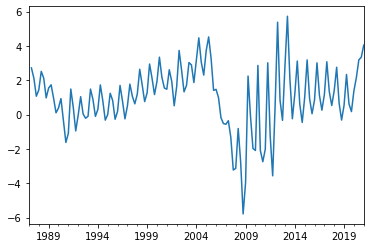

In [19]:
# Check to see if data is non-stationary
# CS['pct_change'] = CS['Case-Shiller U.S. National Home Price Index'].pct_change() *100
# CS['pct_change'].plot()

Conclusion - non stationary

In [20]:
# Load features in DF
feat = pd.read_csv('features.csv',index_col=0, parse_dates=True, infer_datetime_format=True)
feat = feat.loc[CS.index[0]:CS.index[-1]]
feat.shape

(137, 9)

In [25]:
# Create features (X) and target (y) by taking the pct_change to predict pct_change of CS value 
X = feat.diff().dropna()
y = CS.diff().dropna()

In [27]:
y.shape

(136, 1)

In [28]:
X.shape

(136, 9)

In [29]:
X.head()

### Correlation between features
X.corr()

,Homeownership Rate in the United States,Monthly Supply of Houses in the United States,US Population data,Median Sales Price of Houses Sold,GDP,Natural Rate of Unemployment,Consumer Price Index,House Price Index,10-Year Treasury
Homeownership Rate in the United States,1.000000,0.038346,0.120750,-0.172551,-0.520118,-0.000201,-0.245617,0.045587,0.016075
Monthly Supply of Houses in the United States,0.038346,1.000000,0.021081,-0.085167,-0.117489,-0.117290,-0.038624,0.129442,-0.079657
US Population data,0.120750,0.021081,1.000000,-0.052665,-0.056378,0.119806,0.003493,-0.246208,0.060583
Median Sales Price of Houses Sold,-0.172551,-0.085167,-0.052665,1.000000,0.216207,-0.183064,0.025643,0.117552,-0.102720
GDP,-0.520118,-0.117489,-0.056378,0.216207,1.000000,-0.098165,0.502399,0.186926,-0.130822
Natural Rate of Unemployment,-0.000201,-0.117290,0.119806,-0.183064,-0.098165,1.000000,-0.207737,-0.410712,0.055739
Consumer Price Index,-0.245617,-0.038624,0.003493,0.025643,0.502399,-0.207737,1.000000,0.071098,0.042374
House Price Index,0.045587,0.129442,-0.246208,0.117552,0.186926,-0.410712,0.071098,1.000000,-0.228545
10-Year Treasury,0.016075,-0.079657,0.060583,-0.102720,-0.130822,0.055739,0.042374,-0.228545,1.000000


Good to observe low correlation between the features.

In [30]:
y.shape

(136, 1)

In [31]:
# Create Linear Regression model
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [32]:
predicted_y_values = model.predict(X)

In [33]:
# Importing to save plots for Readme
import matplotlib.pyplot as plt

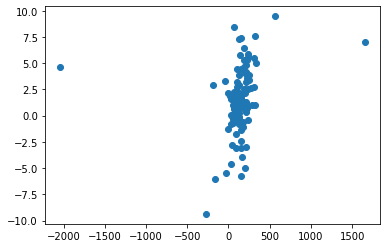

In [34]:
plt.scatter(X['GDP'], y)
#plt.savefig('Regression Predictions Using Features.png')

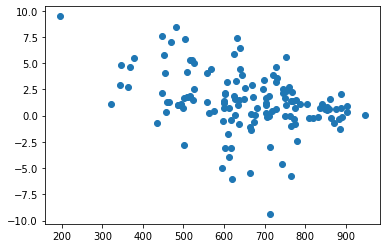

In [35]:
plt.scatter(X['US Population data'], y)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [37]:
# Print releveant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.5233561403437383.
The r2 is 0.5233561403437383.
The mean squared error is 3.8657243844661857.
The root mean squared error is 1.9661445482126145.
The standard deviation is Case-Shiller U.S. National Home Price Index    2.847859
dtype: float64.


In [ ]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

### Conclusion

An R squared of 0.52 means 52% of the variance in the Target (CS-Index) is explained by the features. At a p-value of 0.05, statistically insignificant features are: Monthly supply of houses in the US; Mediam Sales Price of Houses Sold and 10-year Treasury.

Of concern, is the Median Sales Price of Houses Sold being insignificant at p-value of 0.05.However, https://propertyupdate.com.au/median-price/ - as explains, median sales price is not significant when dataset is very heterogenous. Furthermore, capital cities are known for being heterogenous hence may not be of concern.

On a suburb level, where the properties are largely homogenous and therefore of similar pricingm we are likely to see the median price as a more accurate reflection of true value changes.

### Using Lagged Returns as X Variable

In [ ]:
# Creating the Lagged Column
CS['Lagged_Return'] = CS['pct_change'].shift()
CS= CS.dropna()
CS.head()

In [ ]:
CS.shape

In [ ]:
# Set y as the `Return` column
y_2 = CS['pct_change']

In [ ]:
X_2 = CS['Lagged_Return'].to_frame()
X_2.head()

In [ ]:
# Create a Linear Regression model and fit it to the data
model = LinearRegression()
model.fit(X_2, y_2)

In [ ]:
# Creating predicted y values based on X
predictions = model.predict(X_2)

In [ ]:
# Ploting the results. The best fit line is red.
plt.scatter(X_2, y_2)
plt.plot(X_2, predictions, color='red')

In [ ]:
# Evaluating the Model

score = model.score(X_2, y_2, sample_weight=None)
r2 = r2_score(y_2, predictions)
mse = mean_squared_error(y_2, predictions)
rmse = np.sqrt(mse)
std = np.std(y)

In [ ]:
# Print releveant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

### Conclusion

Regression Model using the Features as the X variable provides a much higher R sqaured value of 0.52 than a Regression Model using Lagged Returens as the X variable, which provided a R sqaured value of 0.28.

While the MSE of Regression Model with Lagged Returns is lower (2.38) compared to Regression Model with Features (3.86)

Regression Model using Features as the X value is a better predictor.

# OLR Regression with Test-Train Split

In [38]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Making predictions
predicted_y_values = model.predict(X_test)

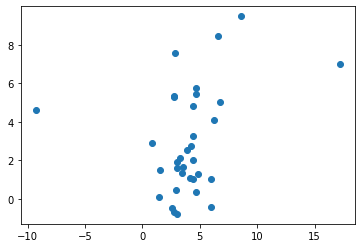

In [40]:
plt.scatter(predicted_y_values, y_test)
plt.savefig('Regression Predictions Using Features.png')

In [41]:
score = model.score(X_test, y_test, sample_weight=None)
r2 = r2_score(y_test, predicted_y_values)
mse = mean_squared_error(y_test, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [42]:
# Print releveant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is -1.1959733617060047.
The r2 is -1.1959733617060047.
The mean squared error is 15.747700328669623.
The root mean squared error is 3.968337224665971.
The standard deviation is Case-Shiller U.S. National Home Price Index    2.847859
dtype: float64.


# Back testing with OLR using train-test split

Using the Linear Regression Model with features as a Baseline, keeping all features.
1. Get X features from 2012-2021
2. Use train test model to predict on those features - done with OLR
3. Look at predictions, when high, buy IYR, when low, sell IYR (for example, if below -5)
4. See what PnL would be for this time period

In [43]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
%matplotlib inline
import json

In [44]:
# Load .env enviroment variables
load_dotenv()

True

In [45]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [87]:
# Creating df from 2013-2017
# Format current date as ISO format
start_date = pd.Timestamp("2013-07-26", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2017-07-26", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["IYR"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for IYR
df = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
#df.index = df.index.date
df.describe()

IYR                                                     
              open         high          low        close        volume
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03
mean     74.264425    74.694250    73.827982    74.287186  7.529349e+06
std       5.466129     5.471448     5.450751     5.473143  3.164098e+06
min      61.250000    61.880000    60.940000    60.950000  2.126553e+06
25%      70.960000    71.377500    70.547500    70.972500  5.353576e+06
50%      75.045000    75.505000    74.670000    75.165000  6.886710e+06
75%      78.225000    78.632500    77.815000    78.222500  8.808305e+06
max      85.500000    85.800000    85.320000    85.720000  3.141008e+07

In [88]:
# Creating second df from 2017 - 2021
# Format current date as ISO format
start_date = pd.Timestamp("2017-07-26", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-07-26", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["IYR"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for IYR
df_2 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
#df.index = df.index.date
df_2.describe()

IYR                                                     
              open         high          low        close        volume
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03
mean     84.424253    85.003483    83.786686    84.425742  6.977077e+06
std       7.855471     7.765729     7.965634     7.883305  3.926676e+06
min      60.660000    60.660000    56.270000    57.700000  9.100870e+05
25%      79.412500    79.877500    78.837500    79.355000  4.561512e+06
50%      82.400000    82.905000    81.940000    82.480000  5.870230e+06
75%      89.640000    90.338750    89.175000    89.782500  8.127944e+06
max     106.550000   106.810000   105.940000   106.260000  3.318459e+07

In [89]:
df.head()

IYR                                 
                            open    high     low  close    volume
time                                                             
2013-08-07 00:00:00-04:00  65.66  65.660  65.081  65.36   5199980
2013-08-08 00:00:00-04:00  65.55  65.700  65.120  65.47   6385446
2013-08-09 00:00:00-04:00  65.38  66.410  65.200  66.07   5922429
2013-08-12 00:00:00-04:00  65.73  65.945  65.331  65.57   7774297
2013-08-13 00:00:00-04:00  65.60  65.650  64.440  64.60  10130713

In [90]:
df_2.head()

IYR                              
                            open   high    low  close   volume
time                                                          
2017-08-03 00:00:00-04:00  80.42  80.73  80.10  80.27  4699142
2017-08-04 00:00:00-04:00  80.25  80.73  80.21  80.52  5281921
2017-08-07 00:00:00-04:00  80.47  80.63  80.16  80.52  3928330
2017-08-08 00:00:00-04:00  80.01  80.44  79.88  80.10  6121296
2017-08-09 00:00:00-04:00  80.30  80.30  79.77  79.99  4016570

In [93]:
# Concat the two dfs from 2013-2021
df_all = pd.concat([df,df_2],axis='rows')

In [94]:
df_all

IYR                                    
                             open     high      low   close    volume
time                                                                 
2013-08-07 00:00:00-04:00   65.66   65.660   65.081   65.36   5199980
2013-08-08 00:00:00-04:00   65.55   65.700   65.120   65.47   6385446
2013-08-09 00:00:00-04:00   65.38   66.410   65.200   66.07   5922429
2013-08-12 00:00:00-04:00   65.73   65.945   65.331   65.57   7774297
2013-08-13 00:00:00-04:00   65.60   65.650   64.440   64.60  10130713
...                           ...      ...      ...     ...       ...
2021-07-19 00:00:00-04:00  104.83  104.890  103.170  103.98  11052952
2021-07-20 00:00:00-04:00  104.52  106.650  104.380  106.24   7472995
2021-07-21 00:00:00-04:00  106.55  106.810  105.940  106.13   6627969
2021-07-22 00:00:00-04:00  105.65  105.760  104.830  105.32   4662667
2021-07-23 00:00:00-04:00  105.68  106.410  105.435  106.26   5234603

[2000 rows x 5 columns]

In [95]:
# Load Target - IYR Data
df_all = df.resample('Q').last()

df_all.shape

(17, 5)

In [96]:
df_all

IYR                                 
                            open   high     low   close    volume
time                                                             
2013-09-30 00:00:00-04:00  64.07  64.52  63.570  63.785   8713816
2013-12-31 00:00:00-05:00  63.29  63.52  62.990  63.090   6253472
2014-03-31 00:00:00-04:00  67.64  67.90  67.085  67.710   7223985
2014-06-30 00:00:00-04:00  71.90  72.07  71.320  71.810   5933976
2014-09-30 00:00:00-04:00  69.57  69.73  69.100  69.200  11410640
2014-12-31 00:00:00-05:00  78.26  78.62  76.760  76.830   7424208
2015-03-31 00:00:00-04:00  79.37  80.20  79.180  79.310   4442740
2015-06-30 00:00:00-04:00  71.85  72.00  71.240  71.350  10078502
2015-09-30 00:00:00-04:00  70.77  71.05  70.320  70.940   9270143
2015-12-31 00:00:00-05:00  75.76  75.85  74.980  75.080   6485959
2016-03-31 00:00:00-04:00  77.33  77.96  77.260  77.870   4819828
2016-06-30 00:00:00-04:00  81.60  82.35  81.030  82.330   8681498
2016-09-30 00:00:00-04:00  81.51  81.77  80.590  80.600   6888160
2016-12-31 00:00:00-05:00  76.33  77.09  75.960  76.910   5173593
2017-03-31 00:00:00-04:00  78.15  78.71  78.010  78.460   7888148
2017-06-30 00:00:00-04:00  80.11  80.33  79.580  79.750   6282787
2017-09-30 00:00:00-04:00  80.21  81.01  80.170  80.770   5595801

In [99]:
df_all.index = df_all.index.date

In [100]:
df_all

IYR                                 
             open   high     low   close    volume
2013-09-30  64.07  64.52  63.570  63.785   8713816
2013-12-31  63.29  63.52  62.990  63.090   6253472
2014-03-31  67.64  67.90  67.085  67.710   7223985
2014-06-30  71.90  72.07  71.320  71.810   5933976
2014-09-30  69.57  69.73  69.100  69.200  11410640
2014-12-31  78.26  78.62  76.760  76.830   7424208
2015-03-31  79.37  80.20  79.180  79.310   4442740
2015-06-30  71.85  72.00  71.240  71.350  10078502
2015-09-30  70.77  71.05  70.320  70.940   9270143
2015-12-31  75.76  75.85  74.980  75.080   6485959
2016-03-31  77.33  77.96  77.260  77.870   4819828
2016-06-30  81.60  82.35  81.030  82.330   8681498
2016-09-30  81.51  81.77  80.590  80.600   6888160
2016-12-31  76.33  77.09  75.960  76.910   5173593
2017-03-31  78.15  78.71  78.010  78.460   7888148
2017-06-30  80.11  80.33  79.580  79.750   6282787
2017-09-30  80.21  81.01  80.170  80.770   5595801

In [103]:
df_all.shape

(17, 5)

In [101]:
# Load features in DF
feat = pd.read_csv('features.csv',index_col=0, parse_dates=True, infer_datetime_format=True)
feat = feat.loc[df_all.index[0]:df_all.index[-1]]
feat.shape

(17, 9)

In [102]:
feat

,Homeownership Rate in the United States,Monthly Supply of Houses in the United States,US Population data,Median Sales Price of Houses Sold,GDP,Natural Rate of Unemployment,Consumer Price Index,House Price Index,10-Year Treasury
2013-09-30,65.3,5.466667,316626.000000,264800.0,16848.748,5.265987,234.305333,326.46,2.340625
2013-12-31,65.2,5.033333,317244.000000,273600.0,17083.137,5.150994,235.346333,329.13,2.416935
2014-03-31,64.8,5.333333,317760.000000,275200.0,17104.555,5.045110,236.257000,331.94,2.390656
2014-06-30,64.7,5.533333,318287.000000,288000.0,17432.909,4.956620,237.479333,338.37,2.201429
2014-09-30,64.4,5.666667,318920.666667,281000.0,17721.657,4.887757,238.462000,343.25,1.984531
2014-12-31,64.0,5.366667,319556.666667,298900.0,17849.912,4.838887,239.411000,346.08,1.739355
2015-03-31,63.7,4.800000,320057.333333,289200.0,18003.399,4.810394,240.246000,349.81,1.364262
2015-06-30,63.4,5.100000,320577.666667,289100.0,18223.577,4.782687,241.699333,355.57,1.551719
2015-09-30,63.7,5.366667,321205.000000,295800.0,18347.425,4.756195,242.899333,360.74,1.530625
2015-12-31,63.8,5.400000,321831.666667,302500.0,18378.803,4.731372,244.185333,363.72,1.352258


In [104]:
# Create features (X) taking the diff in CS-index
X_new = feat.diff().dropna()

In [121]:
# Make predictions - this is the predictions for CS-Index
pred_new = model.predict(X_new)
pred_new = pred_new.reshape(-1)
pred_new

array([5.94803677, 2.99107815, 6.7742004 , 4.44133541, 2.98027425,
       3.50138607, 2.78119905, 3.00293186, 1.48089955, 1.51898726,
       2.73673235, 4.40188295, 2.96142483, 3.30416636, 4.6790632 ,
       3.91534713])

In [122]:
# Comparing Predictions to pct change,
IYR_pct_change = df_all['IYR']['close'].pct_change().dropna()
IYR_pct_change

2013-12-31   -0.010896
2014-03-31    0.073229
2014-06-30    0.060552
2014-09-30   -0.036346
2014-12-31    0.110260
2015-03-31    0.032279
2015-06-30   -0.100366
2015-09-30   -0.005746
2015-12-31    0.058359
2016-03-31    0.037160
2016-06-30    0.057275
2016-09-30   -0.021013
2016-12-31   -0.045782
2017-03-31    0.020153
2017-06-30    0.016441
2017-09-30    0.012790
Name: close, dtype: float64

In [123]:
pred_new>thres

array([ True, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True,  True,  True])

In [129]:
# Trading strategy
# Decision: If CS-Index rises by 5 points or more, we hold IYR for that quarter

thres = 5
# Returns we get for the times we hold. Held for a total of 2 periods out of the 17.
IYR_pct_change.values[pred_new>thres]

array([-0.01089598,  0.06055236])

In [130]:
#To find the mean on average
np.mean(IYR_pct_change.values[pred_new>thres])

0.024828188477975244

In [131]:
# Compared to mean of IYR ETF
IYR_pct_change.mean()

0.01614694546369963